In [1]:
# @title Cài đặt Packages
%%capture
! pip install pandas-profiling
! pip install pydantic-settings
! pip install ydata_profiling
! pip install squarify

import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

In [2]:
# @title Load Dataset
%%capture
from google.colab import drive
import pandas as pd

# Gắn Google Drive
drive.mount('/content/drive')

# Đường dẫn đầy đủ đến tệp Excel
path = '/content/drive/MyDrive/Colab Notebooks/Python project 3/'
ssdata = pd.read_excel(path + 'ecommerce_retail.xlsx', sheet_name='ecommerce retail')

In [3]:
final_project_guidelines = pd.read_excel(path + 'Final_project_guidelines.xlsx')

In [4]:
# @title Get infor about data type & data value
# information của bảng giúp detect loại dữ liệu của từng cột
print(ssdata.info())

print('')

# giúp detect data value của các cột (min, max, count,...)
print(ssdata.describe())

print ('')

# 5 dòng đầu tiên của dataset
ssdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# @title Sử dụng ProfileReport to Understand more about Category Data Type
# profile giúp detect sâu hơn (các cột mang tính chất category, vân vân)
profile = ProfileReport(ssdata)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:09<00:00,  1.18s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# @title Detect lý do cột data value bất hợp lý (Quantity < 0)
# quick check lý do data Quantity < 0
print('Print một số giá trị có Quantity < 0')
print(ssdata[ssdata.Quantity < 0].head())
print('')

# tiếp tục check lý do cột Quantity < 0 có phải do giao dịch bị cancel hay không
print('check lý do cột Quantity < 0 có phải do giao dịch bị cancel hay không')
ssdata['InvoiceNo'] = ssdata['InvoiceNo'].astype(str)
ssdata['check_cancel'] = ssdata['InvoiceNo'].apply(lambda x: True if x[0] == 'C' else False)
print(ssdata[(ssdata.Quantity < 0) & (ssdata.check_cancel == True)].head())

print('')
ssdata[(ssdata.Quantity < 0) & (ssdata.check_cancel == False)].head()

Print một số giá trị có Quantity < 0
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  

check lý do cột Quantity < 0 có phải do giao dịch bị cancel hay không
    InvoiceNo StockCode                       Description  Quantity  \
141 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False


In [7]:
# @title Detect lý do cột data value bất hợp lý (Price < 0)
# quick check lý do Unit Price < 0
print('Print một số giá trị có UnitPrice < 0')
ssdata[ssdata.UnitPrice < 0].head()

Print một số giá trị có UnitPrice < 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False


In [8]:
# @title Xử lý data type và data value không hợp lý
# convert những trường data về đúng format
print(ssdata.columns)
print('')


column_list = ['InvoiceNo','StockCode','Description','CustomerID','Country']
for c in column_list:
     ssdata[c] = ssdata[c].astype(str)

# drop data value không phù hợp
## drop data value có UnitPrice < 0
ssdata = ssdata[ssdata['UnitPrice'] > 0]
## drop data có Quantity < 0
ssdata = ssdata[ssdata['Quantity'] > 0]
## drop data bị cancel
ssdata = ssdata[ssdata.check_cancel == False]
ssdata = ssdata.replace('nan', None)
ssdata = ssdata.replace('Nan',None)
ssdata.shape

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'check_cancel'],
      dtype='object')



(530104, 9)

In [9]:
# @title Thống kê những cột có missing value
# check missing value có trong data
print('Thống kê những cột có missing value')
missing_dict = {
                'volume': ssdata.isnull().sum(),
                'percent': ssdata.isnull().sum() / (ssdata.shape[0])}

missing_ssdata = pd.DataFrame.from_dict(missing_dict)
missing_ssdata.head(10)


Thống kê những cột có missing value


,volume,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,0.249423
Country,0,0.000000
check_cancel,0,0.000000


In [10]:
# @title Check lý do vì sao 1 số data bị missing nhiều
# check lý do CustomerID bị null nhiều như vậy
print(ssdata[ssdata.CustomerID.isnull()].head())

print('')

print(ssdata[ssdata.CustomerID.isnull()].tail())

ssdata['Day'] =  pd.to_datetime(ssdata['InvoiceDate']).dt.date
ssdata['Month'] = ssdata['Day'].apply(lambda x: str(x)[:-3])

ssdata_group_day = ssdata[ssdata.CustomerID.isnull()][['Month','InvoiceNo']].groupby(['Month']).count().reset_index().sort_values(by = ['Month'], ascending = True)
ssdata_group_day.head(50)

     InvoiceNo StockCode                      Description  Quantity  \
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   
1447    536544     21790               VINTAGE SNAP CARDS         9   

             InvoiceDate  UnitPrice CustomerID         Country  check_cancel  
1443 2010-12-01 14:32:00       2.51       None  United Kingdom         False  
1444 2010-12-01 14:32:00       2.51       None  United Kingdom         False  
1445 2010-12-01 14:32:00       0.85       None  United Kingdom         False  
1446 2010-12-01 14:32:00       1.66       None  United Kingdom         False  
1447 2010-12-01 14:32:00       1.66       None  United Kingdom         False  

       InvoiceNo StockCode                     Description  Quantity  \
541536    581498    85099B

,Month,InvoiceNo
0,2010-12,15323
1,2011-01,13077
2,2011-02,7178
3,2011-03,8628
4,2011-04,6454
5,2011-05,7844
6,2011-06,8792
7,2011-07,11820
8,2011-08,7476
9,2011-09,9233


In [11]:
# @title Xử lý missing value
# xử lý missing value
## drop 20% số lượng users bị missing
ssdata = ssdata[ssdata['CustomerID'].notnull()]
ssdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12


In [12]:
# @title Check duplicate value trong dataset
# check duplicated values trong dataset
## thế nào là duplicate data
#df_description_update.head()
ssdata_duplication = ssdata.duplicated(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"])
print (ssdata[ssdata_duplication].shape)
print ('')
print (ssdata.shape)

(10038, 11)

(397884, 11)


In [13]:
# @title Lý do duplicate
# lý do duplication là gì
print(ssdata[ssdata_duplication].head())

print('')

print(ssdata[(ssdata.InvoiceNo == '536381') & (ssdata.StockCode == 71270)].head())

print('')

print(ssdata[(ssdata.InvoiceNo == '536401') & (ssdata.StockCode == 82580)].head())

    InvoiceNo StockCode                      Description  Quantity  \
125    536381     71270                  PHOTO CLIP LINE         3   
498    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         1   
502    536409     85116  BLACK CANDELABRA T-LIGHT HOLDER         5   
517    536409     21866      UNION JACK FLAG LUGGAGE TAG         1   
525    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         2   

            InvoiceDate  UnitPrice CustomerID         Country  check_cancel  \
125 2010-12-01 09:41:00       1.25    15311.0  United Kingdom         False   
498 2010-12-01 11:45:00       6.35    17908.0  United Kingdom         False   
502 2010-12-01 11:45:00       2.10    17908.0  United Kingdom         False   
517 2010-12-01 11:45:00       1.25    17908.0  United Kingdom         False   
525 2010-12-01 11:45:00       6.35    17908.0  United Kingdom         False   

            Day    Month  
125  2010-12-01  2010-12  
498  2010-12-01  2010-12  
502  2010-12-01  2010-1

In [14]:
# @title Xử lý duplicate
# drop duplications
ssdata_drop_duplications = ssdata.drop_duplicates(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"], keep = 'first')
ssdata_drop_duplications.shape

(387846, 11)

In [15]:
ssdata_drop_duplications.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12


In [16]:
ssdata_drop_duplications['cost'] = ssdata_drop_duplications['Quantity'] *  ssdata_drop_duplications['UnitPrice']
last_day = ssdata_drop_duplications['Day'].max()

/tmp/ipython-input-4250015556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssdata_drop_duplications['cost'] = ssdata_drop_duplications['Quantity'] *  ssdata_drop_duplications['UnitPrice']


In [17]:
RFM_ssdata = ssdata_drop_duplications.groupby('CustomerID').agg(
    Recency = ('Day', lambda x: last_day - x.max()),
    Frequency = ('CustomerID','count'),
    Monetary = ('cost','sum'),
    Start_Day = ('Day', 'min')).reset_index()

RFM_ssdata['Recency'] = RFM_ssdata['Recency'].dt.days.astype('int16')
RFM_ssdata['Recency_reverse'] = - RFM_ssdata['Recency'] # lấy ngược dấu
RFM_ssdata['Start_Day'] = pd.to_datetime(RFM_ssdata['Start_Day'])
RFM_ssdata['Start_Month'] = RFM_ssdata['Start_Day'].apply(lambda x : x.replace(day=1))

In [18]:
# using qcut to create R, F, M
RFM_ssdata['R'] = pd.qcut(RFM_ssdata["Recency_reverse"], 5, labels = range(1, 6)).astype(str) # Score recency
RFM_ssdata['F'] = pd.qcut(RFM_ssdata["Frequency"], 5, labels = range(1, 6)).astype(str)
RFM_ssdata['M'] = pd.qcut(RFM_ssdata["Monetary"], 5, labels = range(1, 6)).astype(str)
RFM_ssdata['RFM'] = RFM_ssdata.apply(lambda x: x.R + x.F + x.M, axis = 1)
RFM_ssdata.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM
0,12346.0,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01,2,2,4,224
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01,4,4,4,444
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01,1,2,2,122


In [19]:
# seg
seg = pd.read_excel(path + 'ecommerce_retail.xlsx', sheet_name = 'Segmentation')
seg['RFM Score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM Score').reset_index(drop = True)
seg.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [20]:
# merge proper Segmentation
RFM_ssdata_final = RFM_ssdata.merge(seg, how = 'left', left_on = 'RFM', right_on = 'RFM Score')
RFM_ssdata_final.head(10)

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115,Cannot Lose Them,115
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555,Champions,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01,2,2,4,224,NaN,NaN
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01,4,4,4,444,NaN,NaN
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01,1,2,2,122,NaN,NaN
5,12352.0,36,83,2042.24,2011-02-16,-36,2011-02-01,3,4,4,344,NaN,NaN
6,12353.0,204,4,89.00,2011-05-19,-204,2011-05-01,1,1,1,111,Lost customers,111
7,12354.0,232,58,1079.40,2011-04-21,-232,2011-04-01,1,4,4,144,NaN,NaN
8,12355.0,214,13,459.40,2011-05-09,-214,2011-05-01,1,1,2,112,NaN,NaN
9,12356.0,22,59,2811.43,2011-01-18,-22,2011-01-01,4,4,5,445,NaN,NaN


In [21]:
seg['RFM Score'] = seg['RFM Score'].apply(lambda x: x.strip())

In [22]:
RFM_ssdata_final = RFM_ssdata.merge(seg, how = 'left', left_on = 'RFM', right_on = 'RFM Score')
RFM_ssdata_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,-325,2011-01-01,1,1,5,115,Cannot Lose Them,115
1,12347.0,2,182,4310.00,2010-12-07,-2,2010-12-01,5,5,5,555,Champions,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2010-12-01,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,2011-11-21,-18,2011-11-01,4,4,4,444,Loyal,444
4,12350.0,310,17,334.40,2011-02-02,-310,2011-02-01,1,2,2,122,Hibernating customers,122


/tmp/ipython-input-2659088684.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=RFM_ssdata_final, order=segment_order, palette='viridis')


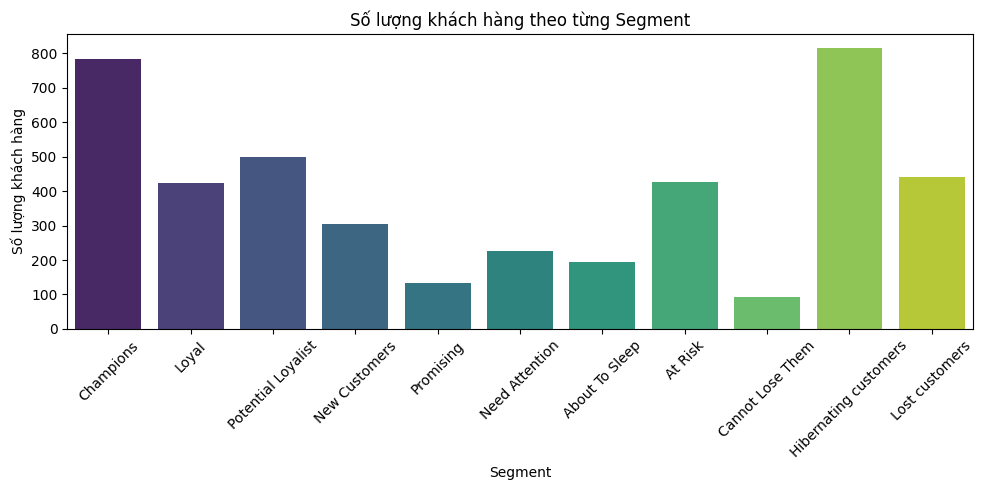

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
segment_order = [
    'Champions',
    'Loyal',
    'Potential Loyalist',
    'New Customers',
    'Promising',
    'Need Attention',
    'About To Sleep',
    'At Risk',
    'Cannot Lose Them',
    'Hibernating customers',
    'Lost customers'
]
plt.figure(figsize=(10,5))
sns.countplot(x='Segment', data=RFM_ssdata_final, order=segment_order, palette='viridis')
plt.xticks(rotation=45)
plt.title("Số lượng khách hàng theo từng Segment")
plt.xlabel("Segment")
plt.ylabel("Số lượng khách hàng")
plt.tight_layout()
plt.show()

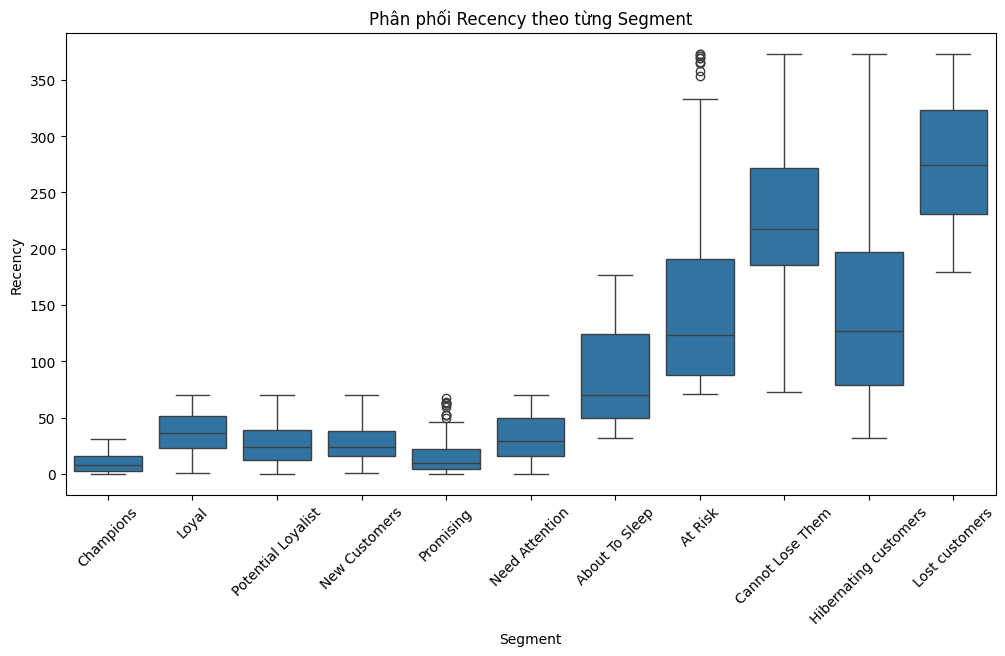

In [24]:
plt.figure(figsize=(12,6))
segment_order = [
    'Champions',
    'Loyal',
    'Potential Loyalist',
    'New Customers',
    'Promising',
    'Need Attention',
    'About To Sleep',
    'At Risk',
    'Cannot Lose Them',
    'Hibernating customers',
    'Lost customers'
]
sns.boxplot(x='Segment', y='Recency', data=RFM_ssdata_final, order = segment_order)
plt.xticks(rotation=45)
plt.title('Phân phối Recency theo từng Segment')
plt.show()


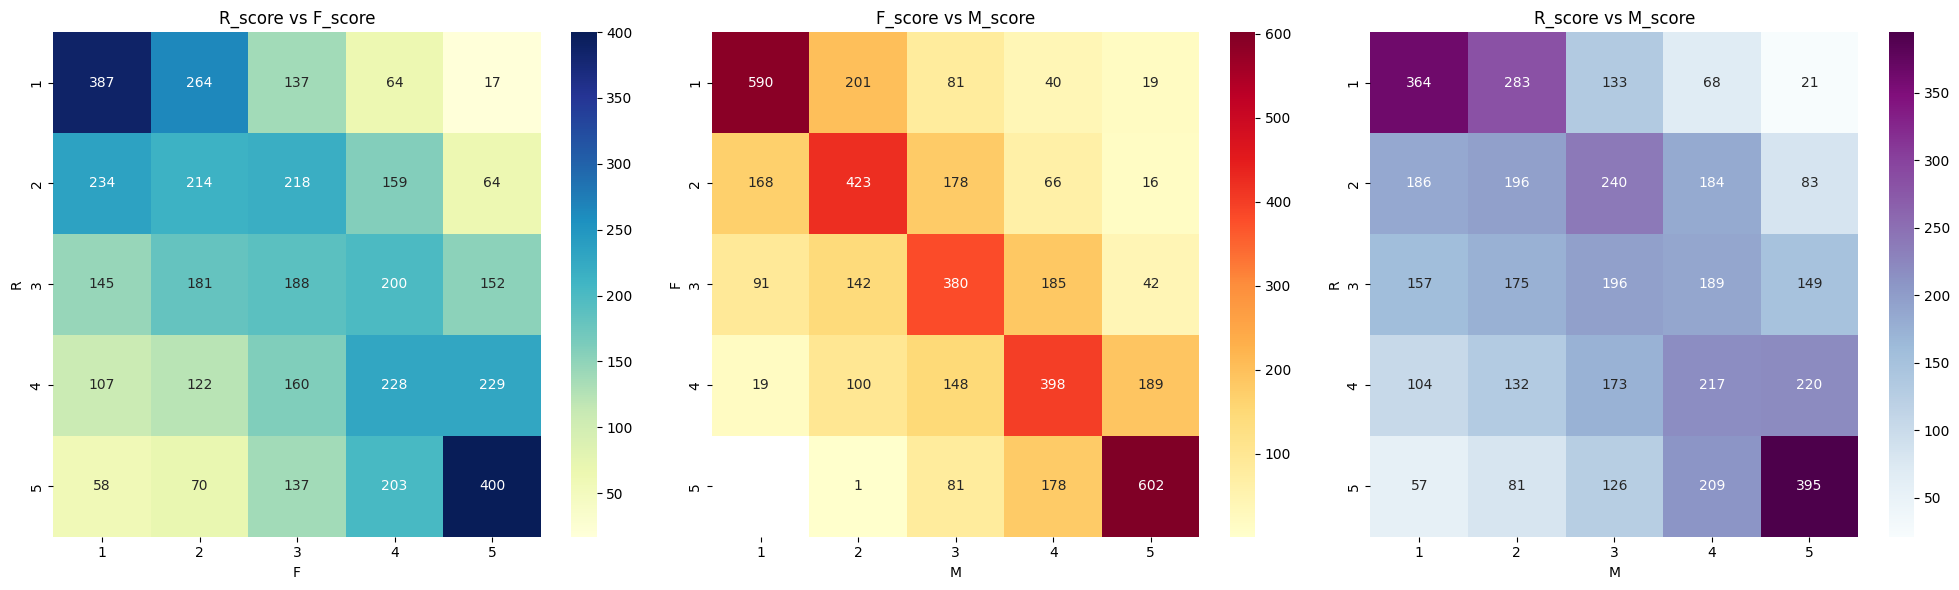

In [25]:
heatmap_rf = RFM_ssdata_final.pivot_table(index='R', columns='F', values='CustomerID', aggfunc='count')
heatmap_fm = RFM_ssdata_final.pivot_table(index='F', columns='M', values='CustomerID', aggfunc='count')
heatmap_rm = RFM_ssdata_final.pivot_table(index='R', columns='M', values='CustomerID', aggfunc='count')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Heatmap 1: Recency vs Frequency
sns.heatmap(heatmap_rf, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('R_score vs F_score')
axes[0].set_xlabel('F')
axes[0].set_ylabel('R')

# Heatmap 2: Frequency vs Monetary
sns.heatmap(heatmap_fm, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('F_score vs M_score')
axes[1].set_xlabel('M')
axes[1].set_ylabel('F')

# Heatmap 3: Recency vs Monetary
sns.heatmap(heatmap_rm, annot=True, fmt='.0f', cmap='BuPu', ax=axes[2])
axes[2].set_title('R_score vs M_score')
axes[2].set_xlabel('M')
axes[2].set_ylabel('R')

plt.tight_layout()
plt.show()



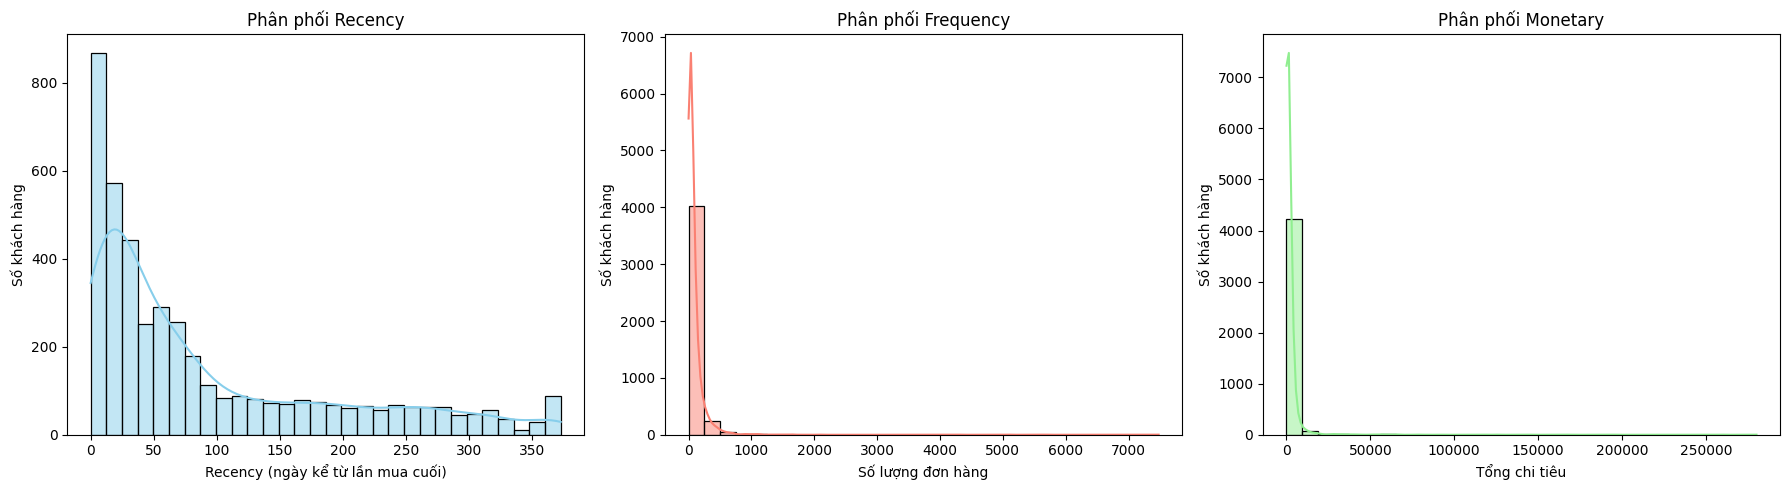

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram Recency
sns.histplot(RFM_ssdata_final['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Phân phối Recency')
axes[0].set_xlabel('Recency (ngày kể từ lần mua cuối)')
axes[0].set_ylabel('Số khách hàng')

# Histogram Frequency
sns.histplot(RFM_ssdata_final['Frequency'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Phân phối Frequency')
axes[1].set_xlabel('Số lượng đơn hàng')
axes[1].set_ylabel('Số khách hàng')

# Histogram Monetary
sns.histplot(RFM_ssdata_final['Monetary'], bins=30, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Phân phối Monetary')
axes[2].set_xlabel('Tổng chi tiêu')
axes[2].set_ylabel('Số khách hàng')

plt.tight_layout()
plt.show()

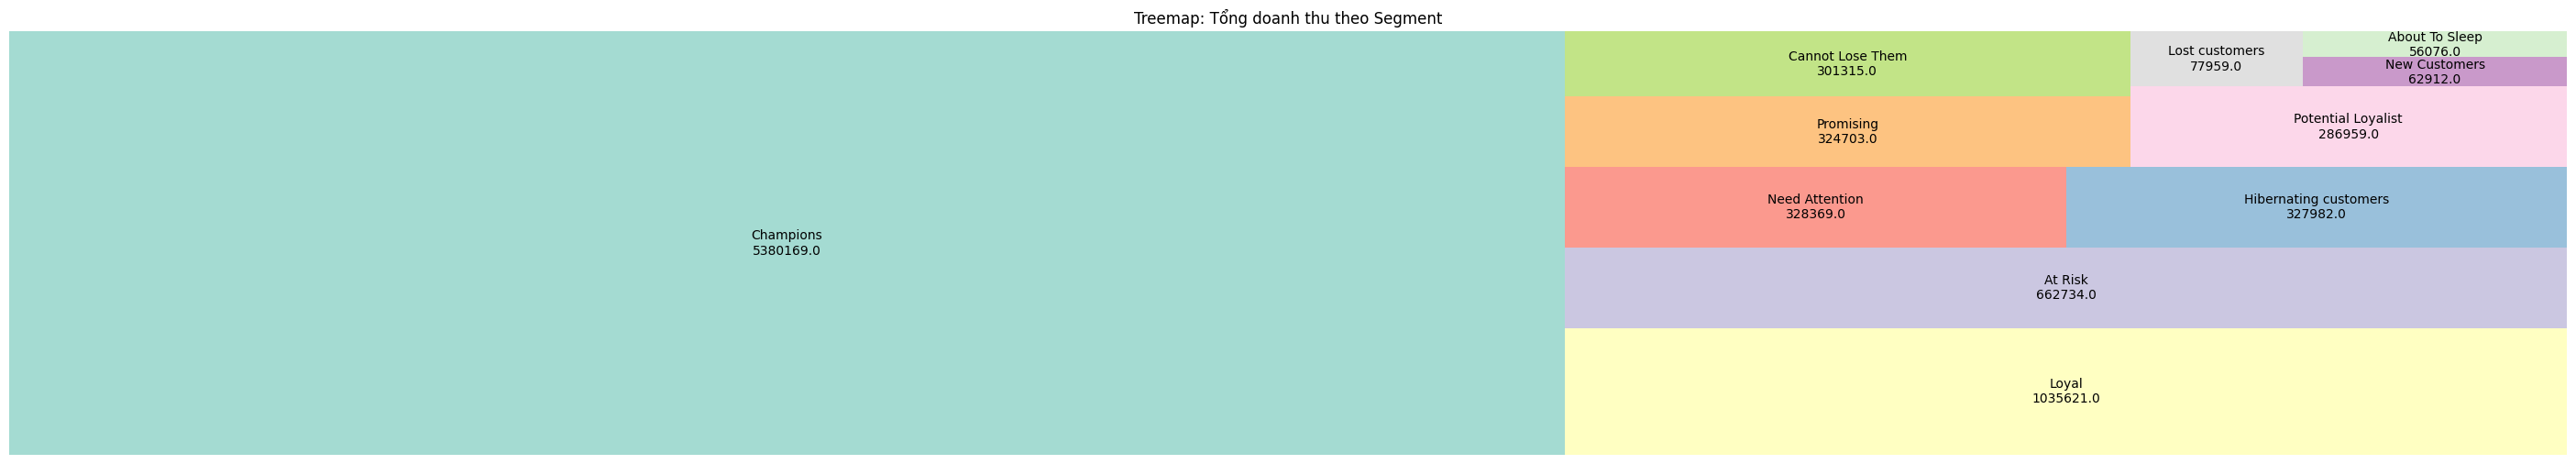

In [27]:
segment_sales = RFM_ssdata_final.groupby('Segment')['Monetary'].sum().reset_index()
segment_sales = segment_sales.sort_values(by='Monetary', ascending=False)

plt.figure(figsize=(36, 6))
squarify.plot(
    sizes=segment_sales['Monetary'],
    label=segment_sales['Segment'] + "\n" + segment_sales['Monetary'].round(0).astype(str),
    alpha=0.8,
    color=plt.cm.Set3.colors
)
plt.axis('off')
plt.title('Treemap: Tổng doanh thu theo Segment')
plt.show()

In [28]:
from google.colab import files
RFM_ssdata_final.to_excel("RFM_ssdata_final.xlsx", index=False)
files.download("RFM_ssdata_final.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Em để link phân tích insight tại đây: https://drive.google.com/drive/folders/1-IqaM0EG4g34bExOTwmEtK1_aTl122ie?usp=drive_link